In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib_venn import venn2, venn3, venn3_unweighted
from rdkit import Chem
from rdkit.Chem import Draw

In [2]:
def inchify(smi):
    return Chem.MolToInchi(Chem.MolFromSmiles(smi))

Had to manually open CombiSolvH-Exp and CombiSolv-Exp and export as CSV since they are malformed.

In [3]:
vermeire_training_solutes = []
vermeire_training_solvents = []
for training_set in (
    Path("../data/SolProp_v1.2/Data/AqueousSolu.csv"),
    Path("../data/SolProp_v1.2/Data/CombiSolv-Exp.csv"),
    Path("../data/SolProp_v1.2/Data/CombiSolv-QM.txt"),
    Path("../data/SolProp_v1.2/Data/CombiSolvH-Exp.csv"),
    Path("../data/SolProp_v1.2/Data/CombiSolvH-QM.txt"),
):
    if training_set.suffix == "xlsx":
        df = pd.read_excel(training_set)
    else:
        df = pd.read_csv(training_set)
    if "Aqueous" in training_set.name:
        vermeire_training_solutes.extend(df["smiles solute"])
    elif "QM" in training_set.name:
        vermeire_training_solutes.extend(df["smiles solute"])
        vermeire_training_solvents.extend(df["smiles solvent"])
    else:
        vermeire_training_solutes.extend(df["smiles_solute"])
        vermeire_training_solvents.extend(df["smiles_solvent"])

# cast to set twice - once to remove immediate dupes, again to remove
# multiple identical representations
vermeire_training_solvents = set(inchify(s) for s in set(vermeire_training_solvents))
vermeire_training_solutes = set(inchify(s) for s in set(vermeire_training_solutes))
print(f"Vemeire training data includes {len(vermeire_training_solvents):d} solvents and {len(vermeire_training_solutes):d} solutes.")

[21:07:19] WARNING: Omitted undefined stereo

[21:07:19] WARNING: Omitted undefined stereo

[21:07:19] WARNING: Omitted undefined stereo

[21:07:19] WARNING: Omitted undefined stereo

[21:07:19] WARNING: Omitted undefined stereo

[21:07:19] WARNING: Metal was disconnected

[21:07:19] WARNING: Omitted undefined stereo

[21:07:19] WARNING: Charges were rearranged

[21:07:19] WARNING: Omitted undefined stereo

[21:07:19] WARNING: Omitted undefined stereo

[21:07:19] WARNING: Omitted undefined stereo

[21:07:19] WARNING: Omitted undefined stereo

[21:07:19] WARNING: Omitted undefined stereo

[21:07:19] WARNING: Omitted undefined stereo

[21:07:19] WARNING: Omitted undefined stereo

[21:07:19] WARNING: Proton(s) added/removed

[21:07:19] WARNING: Omitted undefined stereo

[21:07:19] WARNING: Omitted undefined stereo

[21:07:19] WARNING: Charges were rearranged

[21:07:19] WARNING: Omitted undefined stereo

[21:07:19] WARNING: Omitted undefined stereo

[21:07:19] WARNING: Omitted undefined s

Vemeire training data includes 1536 solvents and 20194 solutes.


[21:07:27] WARNING: Omitted undefined stereo

[21:07:27] WARNING: Charges were rearranged

[21:07:27] WARNING: Omitted undefined stereo

[21:07:27] WARNING: Charges were rearranged

[21:07:27] WARNING: Omitted undefined stereo

[21:07:27] WARNING: Omitted undefined stereo

[21:07:27] WARNING: Omitted undefined stereo

[21:07:27] WARNING: Omitted undefined stereo

[21:07:27] WARNING: Omitted undefined stereo

[21:07:27] WARNING: Omitted undefined stereo

[21:07:27] WARNING: Omitted undefined stereo

[21:07:27] WARNING: Omitted undefined stereo

[21:07:27] WARNING: Omitted undefined stereo

[21:07:27] WARNING: Omitted undefined stereo

[21:07:27] WARNING: Omitted undefined stereo

[21:07:27] WARNING: Omitted undefined stereo

[21:07:27] WARNING: Omitted undefined stereo

[21:07:27] WARNING: Omitted undefined stereo

[21:07:27] WARNING: Proton(s) added/removed



In [4]:
df = pd.read_csv(Path("../data/vermeire/solprop_chemprop_nonaq.csv"), index_col=0)
vermeire_testing_solutes = set(inchify(s) for s in df["solute_smiles"])
vermeire_testing_solvents = set(inchify(s) for s in df["solvent_smiles"])
print(f"Testing data includes {len(vermeire_testing_solvents):d} solvents and {len(vermeire_testing_solutes):d} solutes.")

[21:07:28] WARNING: Omitted undefined stereo

[21:07:28] WARNING: Omitted undefined stereo

[21:07:28] WARNING: Omitted undefined stereo

[21:07:28] WARNING: Omitted undefined stereo

[21:07:28] WARNING: Omitted undefined stereo

[21:07:28] WARNING: Omitted undefined stereo

[21:07:28] WARNING: Omitted undefined stereo

[21:07:28] WARNING: Omitted undefined stereo

[21:07:28] WARNING: Omitted undefined stereo

[21:07:28] WARNING: Omitted undefined stereo

[21:07:28] WARNING: Omitted undefined stereo

[21:07:28] WARNING: Omitted undefined stereo

[21:07:28] WARNING: Omitted undefined stereo

[21:07:28] WARNING: Omitted undefined stereo

[21:07:28] WARNING: Omitted undefined stereo

[21:07:28] WARNING: Omitted undefined stereo

[21:07:28] WARNING: Omitted undefined stereo

[21:07:28] WARNING: Omitted undefined stereo

[21:07:28] WARNING: Omitted undefined stereo

[21:07:28] WARNING: Omitted undefined stereo

[21:07:28] WARNING: Omitted undefined stereo

[21:07:28] WARNING: Omitted undefi

Testing data includes 97 solvents and 101 solutes.


In [5]:
df = pd.read_csv(Path("../data/boobier/leeds_acetone_chemprop.csv"), index_col=0)
leeds_acetone_solutes = set(inchify(s) for s in df["solute_smiles"])
df = pd.read_csv(Path("../data/boobier/leeds_benzene_chemprop.csv"), index_col=0)
leeds_benzene_solutes = set(inchify(s) for s in df["solute_smiles"])
df = pd.read_csv(Path("../data/boobier/leeds_ethanol_chemprop.csv"), index_col=0)
leeds_ethanol_solutes = set(inchify(s) for s in df["solute_smiles"])
all_leeds_solvents = {inchify("CO"), inchify("CC(=O)C"), inchify("C1=CC=CC=C1")}

[21:07:30] WARNING: Charges were rearranged

[21:07:30] WARNING: Charges were rearranged

[21:07:30] WARNING: Charges were rearranged

[21:07:30] WARNING: Omitted undefined stereo

[21:07:30] WARNING: Charges were rearranged

[21:07:30] WARNING: Omitted undefined stereo

[21:07:30] WARNING: Omitted undefined stereo

[21:07:30] WARNING: Charges were rearranged

[21:07:30] WARNING: Charges were rearranged

[21:07:30] WARNING: Omitted undefined stereo

[21:07:30] WARNING: Charges were rearranged

[21:07:30] WARNING: Charges were rearranged

[21:07:30] WARNING: Omitted undefined stereo

[21:07:30] WARNING: Charges were rearranged

[21:07:30] WARNING: Omitted undefined stereo

[21:07:30] WARNING: Omitted undefined stereo

[21:07:30] WARNING: Charges were rearranged; Omitted undefined stereo

[21:07:30] WARNING: Omitted undefined stereo

[21:07:30] WARNING: Charges were rearranged

[21:07:30] WARNING: Omitted undefined stereo

[21:07:30] WARNING: Omitted undefined stereo

[21:07:30] WARNING:

In [6]:
df = pd.read_csv(Path("../data/krasnov/bigsoldb_chemprop_nonaq.csv"), index_col=0)
krasnov_solutes = set(inchify(s) for s in df["solute_smiles"])
krasnov_svents = set(inchify(s) for s in df["solvent_smiles"])

[21:07:30] WARNING: Charges were rearranged

[21:07:30] WARNING: Charges were rearranged

[21:07:30] WARNING: Charges were rearranged

[21:07:30] WARNING: Charges were rearranged

[21:07:30] WARNING: Charges were rearranged

[21:07:30] WARNING: Charges were rearranged

[21:07:30] WARNING: Charges were rearranged

[21:07:30] WARNING: Charges were rearranged

[21:07:30] WARNING: Charges were rearranged

[21:07:30] WARNING: Charges were rearranged

[21:07:30] WARNING: Charges were rearranged

[21:07:30] WARNING: Charges were rearranged

[21:07:30] WARNING: Charges were rearranged

[21:07:30] WARNING: Charges were rearranged

[21:07:30] WARNING: Charges were rearranged

[21:07:30] WARNING: Charges were rearranged

[21:07:30] WARNING: Charges were rearranged

[21:07:30] WARNING: Charges were rearranged

[21:07:30] WARNING: Charges were rearranged

[21:07:30] WARNING: Omitted undefined stereo

[21:07:30] WARNING: Omitted undefined stereo

[21:07:30] WARNING: Omitted undefined stereo

[21:07:

In [7]:
all_leeds_solutes = set(list(leeds_acetone_solutes) + list(leeds_benzene_solutes) + list(leeds_ethanol_solutes))

In [8]:
krasnov_solutes.intersection(vermeire_testing_solutes)

set()

/home/jackson/miniconda3/envs/fprop/lib/python3.11/site-packages/matplotlib_venn/_util.py:62: UserWarning: venn3_unweighted is deprecated. Use venn3 with the appropriate layout_algorithm instead.
  warnings.warn(


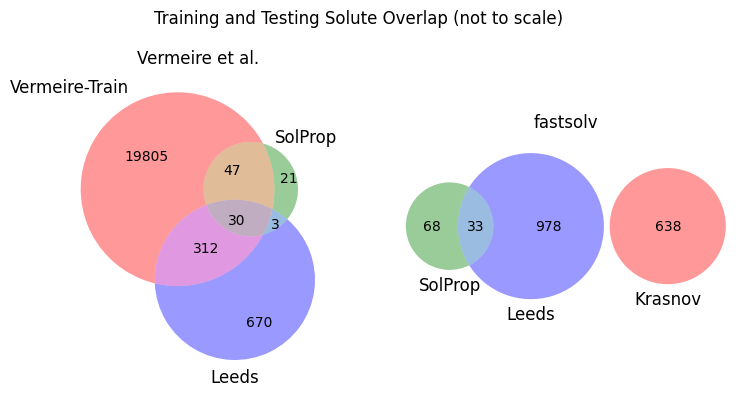

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

fig.suptitle("Training and Testing Solute Overlap (not to scale)")
plt.sca(axes[0])
axes[0].set_title("Vermeire et al.")
venn3_unweighted(
    [vermeire_training_solutes, vermeire_testing_solutes, all_leeds_solutes],
    ("Vermeire-Train", "SolProp", "Leeds"),
    # (Abc, aBc, ABc, abC, AbC, aBC, ABC)
    subset_areas=(1000, 4*10, 23*10, 675, 309, 50, 60),
    subset_label_formatter=lambda x: str(x) if x else "",
)
plt.sca(axes[1])
axes[1].set_title("fastsolv")
venn3_unweighted(
    [krasnov_solutes, vermeire_testing_solutes, all_leeds_solutes],
    ("Krasnov", "SolProp", "Leeds"),
    # (Abc, aBc, ABc, abC, AbC, aBC, ABC)
    subset_areas=(704, 270, 0, 984, 0, 130, 0),
)

plt.tight_layout()
plt.show()

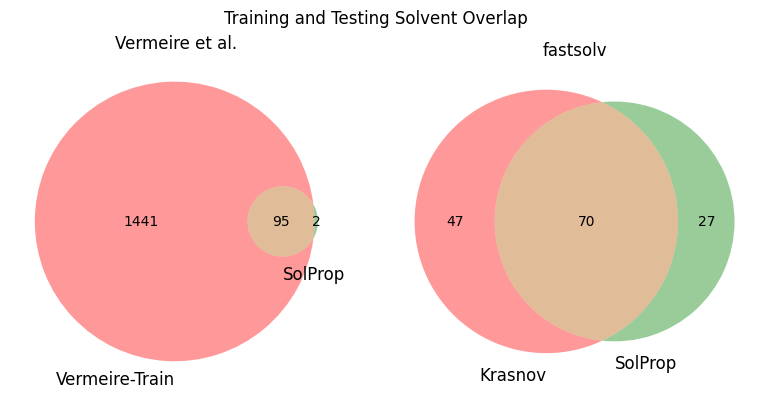

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

fig.suptitle("Training and Testing Solvent Overlap")
plt.sca(axes[0])
axes[0].set_title("Vermeire et al.")
venn2(
    [vermeire_training_solvents, vermeire_testing_solvents],
    ("Vermeire-Train", "SolProp"),
)
plt.sca(axes[1])
axes[1].set_title("fastsolv")
venn2(
    [krasnov_svents, vermeire_testing_solvents],
    ("Krasnov", "SolProp"),
)

plt.tight_layout()
plt.show()